In [1]:
#Select important metal elements (Lead, Copper, Zinc, Tin, Gold) from sites with 23 years of data
import pandas as pd

#Read
#station_info_df = pd.read_csv('total_station_info_with_counts.csv')
station_info_df = pd.read_csv('minewater_stations_info_sorted.csv')

#sites with 23 years of data
stations_with_24_years = station_info_df[station_info_df['Year Count'] == 23]

station_coords = stations_with_24_years[['Northing', 'Easting']]

element_mapping = {
    'Lead': 'Pb',
    'Copper': 'Cu',
    'Zinc': 'Zn',
    'Tin': 'Sn',
    'Gold': 'Au'
}

element_counts = {v: {} for v in element_mapping.values()}

# Read the annual data file and count the amount of data
years = range(2000, 2023 + 1)
for year in years:
    df = pd.read_csv(f'{year} Water Quality Archive Unified.csv', low_memory=False)

    df['parameter_name'] = df['parameter_name'].str.upper().str.strip()

    for abbreviation in element_mapping.values():
        element_counts[abbreviation][year] = 0

    for _, coord_row in station_coords.iterrows():
        northing, easting = coord_row['Northing'], coord_row['Easting']

        df_filtered = df[
            (df['northing'] == northing) & 
            (df['easting'] == easting)
        ]

        for full_name, abbreviation in element_mapping.items():
            df_element = df_filtered[df_filtered['parameter_name'].str.contains(full_name.upper())]
            element_counts[abbreviation][year] += df_element.shape[0]

element_counts_df = pd.DataFrame(element_counts).T

print(element_counts_df)

# save
#element_counts_df.to_csv('element_counts_per_year_with_coords.csv')

# print
print("Stations with 24 years of data and their coordinates:")
print(station_coords)



    2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  ...  2014  \
Pb     0     0     0     0     0     0     0     0     0     0  ...     0   
Cu     0     0     0     0     0     0     0     0     0     0  ...     0   
Zn     0     0     0     0     0     0     0     0     0     0  ...     0   
Sn     0     0     0     0     0     0     0     0     0     0  ...     0   
Au     0     0     0     0     0     0     0     0     0     0  ...     0   

    2015  2016  2017  2018  2019  2020  2021  2022  2023  
Pb     0     0     0     0     0     0     0     0     0  
Cu     0     0     0     0     0     0     0     0     0  
Zn     0     0     0     0     0     0     0     0     0  
Sn     0     0     0     0     0     0     0     0     0  
Au     0     0     0     0     0     0     0     0     0  

[5 rows x 24 columns]
Stations with 24 years of data and their coordinates:
   Northing  Easting
0    210470   282510
1    366870   261550
2    210450   282500
3    210560   283030


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Import water quality data 
data = pd.read_csv('2017 Water Quality Archive Unified.csv') 

# Check dataframe head 
print("Dataframe head：")
print(data.head(),"\n")

# Check dataframe shape 
print("Dataframe shape ：")
print(data.shape,"\n")


Dataframe head：
  station_number      station_name  \
0      S00062260  WELSHPOOL STW FE   
1      S00062260  WELSHPOOL STW FE   
2      S00062260  WELSHPOOL STW FE   
3      S00062260  WELSHPOOL STW FE   
4      S00062260  WELSHPOOL STW FE   

                                        station_type  easting  northing  \
0  SEWAGE DISCHARGES - FINAL/TREATED EFFLUENT - W...   323449    307269   
1  SEWAGE DISCHARGES - FINAL/TREATED EFFLUENT - W...   323449    307269   
2  SEWAGE DISCHARGES - FINAL/TREATED EFFLUENT - W...   323449    307269   
3  SEWAGE DISCHARGES - FINAL/TREATED EFFLUENT - W...   323449    307269   
4  SEWAGE DISCHARGES - FINAL/TREATED EFFLUENT - W...   323449    307269   

            ngr local_authority    sampling_datetime  \
0  SJ2344907269     POWYS-POWYS  2017-01-04 11:20:00   
1  SJ2344907269     POWYS-POWYS  2017-01-04 11:20:00   
2  SJ2344907269     POWYS-POWYS  2017-01-04 11:20:00   
3  SJ2344907269     POWYS-POWYS  2017-01-14 08:30:00   
4  SJ2344907269     POWY

In [9]:
#The frequency of occurrence of specific elements, at a specified monitoring site
import pandas as pd

# Read
station_info_df = pd.read_csv('total_station_info_with_counts.csv')

stations_with_24_years = station_info_df[station_info_df['Year Count'] == 24]

station_coords = stations_with_24_years[['Northing', 'Easting']]

element_mapping = {
    'Lead': 'Pb',
    'Copper': 'Cu',
    'Zinc': 'Zn',
    'Tin': 'Sn',
    #'Gold': 'Au'
}

element_counts = {v: {} for v in element_mapping.values()}

found_data = {v: [] for v in element_mapping.values()}

years = range(2000, 2023 + 1)
for year in years:

    df = pd.read_csv(f'{year} Water Quality Archive Unified.csv', low_memory=False)
 
    df['parameter_name'] = df['parameter_name'].str.upper().str.strip()
    
    for abbreviation in element_mapping.values():
        element_counts[abbreviation][year] = 0

    for _, coord_row in station_coords.iterrows():
        northing, easting = coord_row['Northing'], coord_row['Easting']

        df_filtered = df[
            (df['northing'] == northing) & 
            (df['easting'] == easting)
        ]
        
        for full_name, abbreviation in element_mapping.items():
            df_element = df_filtered[df_filtered['parameter_name'].str.contains(full_name.upper())]
            element_counts[abbreviation][year] += df_element.shape[0]
            
            if not df_element.empty:
                df_element = df_element[['parameter_name', 'sample_value']]
                df_element['year'] = year
                df_element['element'] = abbreviation
                found_data[abbreviation].append(df_element)

# DataFrame 
element_counts_df = pd.DataFrame(element_counts).T

# save
element_counts_df.to_csv('element_counts_per_year_with_coords.csv')

# Save sample_value 
for element, data_list in found_data.items():
    if data_list: 
        df_combined = pd.concat(data_list)
        df_combined.to_csv(f'found_sample_values_{element}.csv', index=False)

# Calculate the number of SAMPLE_values for each element in found_data per year
found_counts = {element: {} for element in element_mapping.values()}
for element, data_list in found_data.items():
    if data_list:
        df_combined = pd.concat(data_list)
        for year in years:
            found_counts[element][year] = df_combined[df_combined['year'] == year].shape[0]

found_counts_df = pd.DataFrame(found_counts).T

# save found_counts_df 
found_counts_df.to_csv('found_counts_per_year.csv')

# Compare two DataFrame
comparison = element_counts_df.compare(found_counts_df)

# save
comparison.to_csv('comparison_result.csv')

# print
if comparison.empty:
    print("All counts match!")
else:
    print("Discrepancies found:")
    print(comparison)




All counts match!


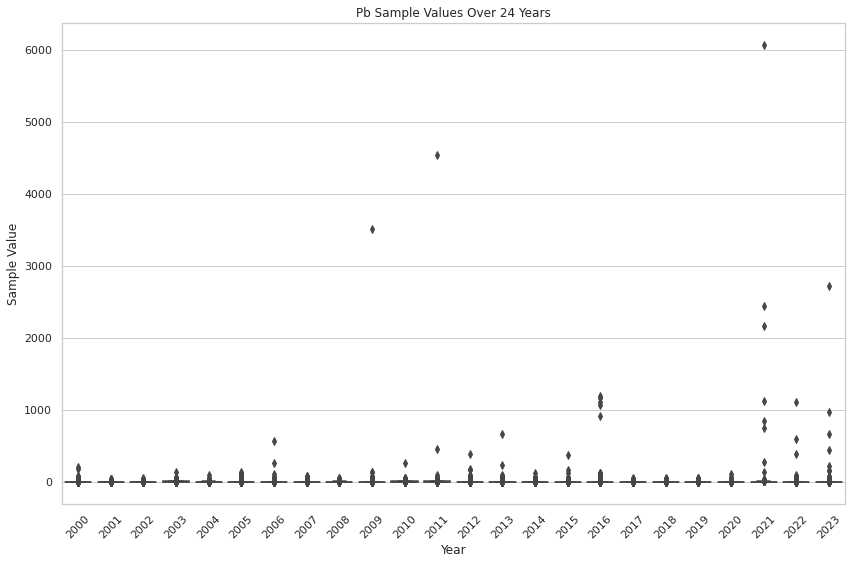

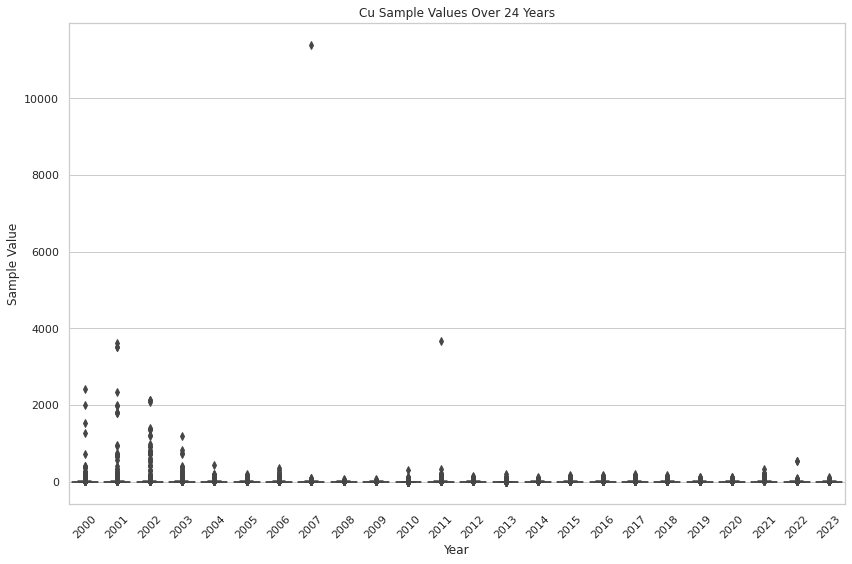

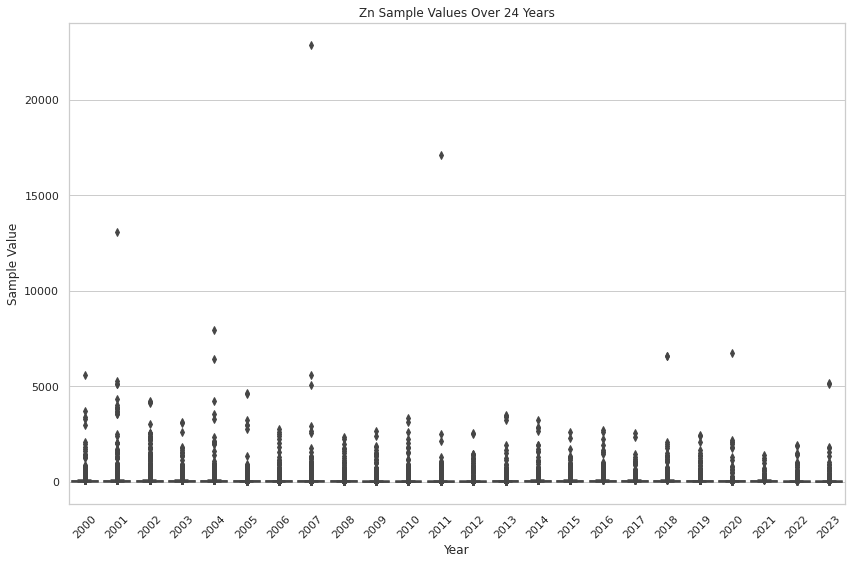

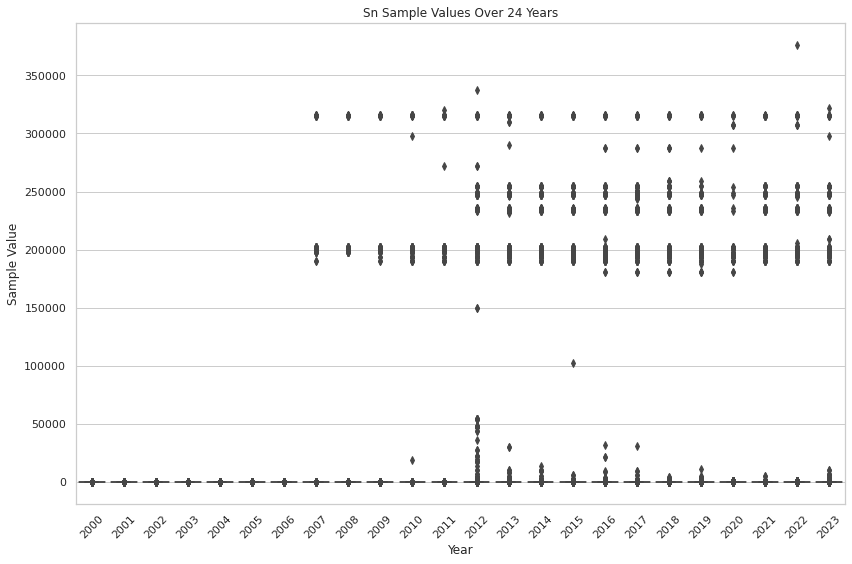

In [10]:
#Iterate over each element and draw a box diagram for it
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

for element, data_list in found_data.items():
    if data_list:

        df_combined = pd.concat(data_list)

        plt.figure(figsize=(12, 8))
        sns.boxplot(x='year', y='sample_value', data=df_combined)
        
        plt.title(f'{element} Sample Values Over 24 Years')
        plt.xlabel('Year')
        plt.ylabel('Sample Value')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
